<br><h1 style = "font-size:35px; font-family:Huihoo ; font-weight : bold; text-align: center; ">Python Project</h1>

<br><h1 style = "font-size:35px; font-family:Garamond ; font-weight : bold; background-color: #C66363 ; color : #E8D6D8; text-align: center; border-radius: 100px 100px;"> PERSONAL LOAN APPROVAL CLASSIFICATION </h1>

<br><h1 style = "font-size:35px; font-family:Huihoo ; font-weight : bold; text-align: center; "> Logistic Regression  </h1>

Logistic regression is a statistical model in which the response variable takes a discrete value and the
explanatory variables can either be continuous or discrete.

Assume that the outcomes are called positive (usually coded as Y = 1) and negative (usually coded as Y = 0). Then the probability that a record belongs to a positive class, P(Y = 1), using the binary logistic regression model is given by

Here X1, X2, …, Xm are the independent variables or features.

 <H2><p style="text-align: center;"> Step 1: Data Collection/Extraction

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
loan=pd.read_excel('Bank_PersonalLoan.xlsx')

In [4]:
loan

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


##### The dataset contains 5000 records and 14 columns.

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
loan.iloc[0:10,0:14]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [7]:
print ("Rows     : " , loan.shape[0])
print ("Columns  : " , loan.shape[1])

Rows     :  5000
Columns  :  14


In [8]:
print ("#"*60,"\nMissing values :\n\n", loan.isnull().sum().sort_values(ascending=False))

############################################################ 
Missing values :

 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [9]:
print ("#"*60,"\nUnique values :  \n\n", loan.nunique())

############################################################ 
Unique values :  

 ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64


In [10]:
loan.corr()['Personal Loan']

ID                   -0.024801
Age                  -0.007726
Experience           -0.007413
Income                0.502462
ZIP Code              0.000107
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

## Inference 
•	Proportional:Variable Income, CCAvg and CD Account are highly proportional to the quality of data of a person.

•	Inversely Proportional: Variable ID, Age and Experience  inversely proportional to the quality of data of a person.

 <H2><p style="text-align: center;"> Step 2: Preprocessing the Data

In [11]:
df_loan=loan.drop(['ID'],axis=1)

In [12]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [13]:
df_loan.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### 2 (a). Encoding Categorical Features 

In [14]:
oneHotCols=['Education']
df_loan=pd.get_dummies(df_loan,columns=oneHotCols)

#### We have 6 categorical independent variables but 4 of them are binary, so we'll have the same results with them even after creating dummies. So, we will only make dummies for Education.

In [15]:
df_loan.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,25,1,49,91107,4,1.6,0,0,1,0,0,0,1,0,0
1,45,19,34,90089,3,1.5,0,0,1,0,0,0,1,0,0
2,39,15,11,94720,1,1.0,0,0,0,0,0,0,1,0,0
3,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0


In [16]:
df_loan.shape

(5000, 15)

In [17]:
## We need to add a new column and set its value to 1, for the model to estimate the intercept. 

import statsmodels.api as sm

df_loan=sm.add_constant(df_loan)

In [18]:
x=df_loan
x.head()

,const,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,1.0,25,1,49,91107,4,1.6,0,0,1,0,0,0,1,0,0
1,1.0,45,19,34,90089,3,1.5,0,0,1,0,0,0,1,0,0
2,1.0,39,15,11,94720,1,1.0,0,0,0,0,0,0,1,0,0
3,1.0,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,1.0,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0


In [19]:
y=x['Personal Loan']

In [20]:
X=x.drop(['Personal Loan'],axis=1)

In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   const               5000 non-null   float64
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Education_1         5000 non-null   uint8  
 14  Education_2         5000 non-null   uint8  
 15  Education_3         5000 non-null   uint8  
dtypes: flo

## <H2><p style="text-align: center;"> Step 3: Splitting the Dataset into Train and Validation Sets

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=0)

test_size = 0.3 implies 30% of the data is used for validating the model and the remaining 70% is used for training the model.

In [23]:
print('X_train Shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train Shape: (3500, 15)
y_train shape: (3500,)
X_test shape: (1500, 15)
y_test shape: (1500,)


## Inference:

X_train and y_train contain the independent variables and response variable values for the training 
dataset respectively. Similarly, X_test and y_test contain the independent variables and response variable 
values for the test dataset, respectively.

<H2><p style="text-align: center;"> Step 4: Building Logistic Regression Model

In [24]:
logReg_1=sm.Logit(y_train,X_train)

logReg_1=logReg_1.fit()

Optimization terminated successfully.
         Current function value: 0.115919
         Iterations 9


In [25]:
logReg_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.645      
Dependent Variable: Personal Loan    AIC:              839.4350   
Date:               2022-10-19 19:57 BIC:              925.6823   
No. Observations:   3500             Log-Likelihood:   -405.72    
Df Model:           13               LL-Null:          -1142.2    
Df Residuals:       3486             LLR p-value:      2.9676e-307
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     9.0000                                        
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const              -3.5808      nan     nan    nan     nan     nan
Age                -0.0773   0.0811 -0.9525 0.3408 -0.2362  0.0817
Experience          0.0820   0.0803  1.0211 0.3072 -0.0754  0.2395
Income              0.0609   0.0036 16.7334 0.0000  0.0537  0.0680
ZIP Code           -0.0000   0.0001 -0.7796 0.4356 -0.0001  0.0001
Family              0.5514   0.0914  6.0306 0.0000  0.3722  0.7307
CCAvg               0.2478   0.0544  4.5581 0.0000  0.1412  0.3544
Mortgage            0.0010   0.0007  1.4180 0.1562 -0.0004  0.0025
Securities Account -0.7922   0.3519 -2.2511 0.0244 -1.4819 -0.1025
CD Account          3.9081   0.4141  9.4364 0.0000  3.0964  4.7198
Online             -0.9033   0.1994 -4.5297 0.0000 -1.2941 -0.5125
CreditCard         -1.0090   0.2516 -4.0102 0.0001 -1.5021 -0.5159
Education_1        -4.1784      nan     nan    nan     nan     nan
Education_2         0.3085      nan     nan    nan     nan     nan
Education_3         0.2891      nan     nan    nan     nan     nan
==================================================================

"""

In [26]:

X_new_1=X.drop(['Age','Mortgage','Education_1','Education_2','Education_3','Experience', 'ZIP Code'],axis=1)

In [27]:
X_new_1.head()

,const,Income,Family,CCAvg,Securities Account,CD Account,Online,CreditCard
0,1.0,49,4,1.6,1,0,0,0
1,1.0,34,3,1.5,1,0,0,0
2,1.0,11,1,1.0,0,0,0,0
3,1.0,100,1,2.7,0,0,0,0
4,1.0,45,4,1.0,0,0,0,1


## Inference
•	The model summary suggests that as per Wald’s test, only 7 features are statistically significant at a significant value of α=0.05, as p-values are less than 0.05. p-value for likelihood ratio test (almost 0.00) indicates that the overall model is statistically significant.

•	In this case 'Age','Mortgage','Education_1','Education_2','Education_3','Experience', 'ZIP Code' all the attributes have a high p-value which means it is not significant therefore we can drop the complete variable.

### 4 (a). Model Diagnostics


In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_new_1,y, test_size=0.3,random_state=10)

In [29]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3500, 8), (1500, 8), (3500,), (1500,))

In [30]:
logReg_2=sm.Logit(y_train,X_train)
logReg_2=logReg_2.fit()

Optimization terminated successfully.
         Current function value: 0.159433
         Iterations 9


In [31]:
logReg_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:               Logit            Pseudo R-squared: 0.500      
Dependent Variable:  Personal Loan    AIC:              1132.0330  
Date:                2022-10-19 19:58 BIC:              1181.3171  
No. Observations:    3500             Log-Likelihood:   -558.02    
Df Model:            7                LL-Null:          -1115.7    
Df Residuals:        3492             LLR p-value:      1.4642e-236
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const              -8.7269   0.4370 -19.9715 0.0000 -9.5834 -7.8705
Income              0.0442   0.0024  18.2322 0.0000  0.0394  0.0489
Family              0.8247   0.0839   9.8345 0.0000  0.6604  0.9891
CCAvg               0.0479   0.0400   1.1978 0.2310 -0.0305  0.1263
Securities Account -0.6243   0.2886  -2.1629 0.0305 -1.1900 -0.0586
CD Account          3.4840   0.3264  10.6755 0.0000  2.8444  4.1237
Online             -0.7000   0.1684  -4.1557 0.0000 -1.0301 -0.3699
CreditCard         -1.0337   0.2134  -4.8436 0.0000 -1.4520 -0.6154
===================================================================

"""

<H2><p style="text-align: center;"> Step 5: Predicting on Test Data



In [32]:
y_pred=logReg_2.predict(X_test)

In [33]:
y_pred.head(20)

245     0.002666
4493    0.001945
4583    0.008283
2242    0.000783
3407    0.010409
807     0.258443
693     0.002721
515     0.019965
3224    0.006699
549     0.003412
4846    0.319515
3863    0.005674
29      0.324277
3960    0.017536
1444    0.769911
4313    0.002436
484     0.021729
3235    0.002530
1175    0.000881
274     0.023896
dtype: float64

In [34]:
# Create a DF

pred_df= pd.DataFrame({'Actual_Class':y_test, 'Predicted_Prob':y_pred})

In [35]:
pred_df.head(15)

,Actual_Class,Predicted_Prob
245,0,0.002666
4493,0,0.001945
4583,1,0.008283
2242,0,0.000783
3407,0,0.010409
807,0,0.258443
693,0,0.002721
515,0,0.019965
3224,0,0.006699
549,0,0.003412


## Inference:
To understand how many observations the model has classified correctly and how many it has not, a cut-off probability needs to be assumed. Assume that the cut-off probability is 0.5; then all observations with predicted probability of more than 0.5 will be predicted as bad credits(1) and rest all as good credits(0). 

In [36]:
pred_df['Predicted_Class']=pred_df['Predicted_Prob'].map(lambda x: 1 if x>0.5 else 0)

In [37]:
pred_df.iloc[0:50]

,Actual_Class,Predicted_Prob,Predicted_Class
245,0,0.002666,0
4493,0,0.001945,0
4583,1,0.008283,0
2242,0,0.000783,0
3407,0,0.010409,0
807,0,0.258443,0
693,0,0.002721,0
515,0,0.019965,0
3224,0,0.006699,0
549,0,0.003412,0


### Learning
•	The actual column in the DataFrame depicts the actual label of the credit in the test set, while 
predicted column depicts what the model has predicted by taking 0.5 as cut-off probability value. For 
observation 4583, the model predicts very low probability (0.0082) of being a bad credit whereas it is actually 
a bad credit. The model has wrongly classified this one. But the model predicts high probability (0.7699) 
of being a bad credit for observation 1444, which is actually a bad credit. The model correctly predicted 
the class in this case.

## Inference
•	It can be noticed from actual and predicted columns that some classifications are correct and some are 
wrong. For better understanding of this confusion, we can build a confusion matrix.

<H2><p style="text-align: center;"> Step 6: Performance Measures

### 6 (a). Creating a Confusion Matrix



Confusion matrix (also known as error matrix or classification table) is a matrix formed by checking 
the actual values and predicted values of observations in the dataset.


In [38]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(pred_df['Actual_Class'],pred_df['Predicted_Class'])

print(' Confusion matrix is given by: \n',cm)

 Confusion matrix is given by: 
 [[1319   41]
 [  63   77]]


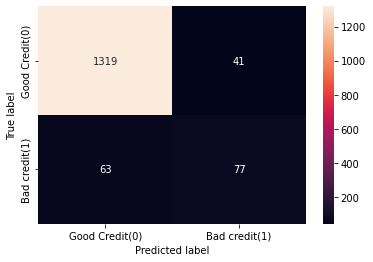

In [39]:
from sklearn import metrics
def draw_cm( actual, predicted ):
## Cret
    cm = metrics.confusion_matrix( Actual_Class, Predicted_Class, [1,0] ) 
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels = ['Good Credit(0)','Bad credit(1)' ],
           yticklabels = ['Good Credit(0)','Bad credit(1)'] )
plt.ylabel('True label') 
plt.xlabel('Predicted label') 
plt.show()

### Learning

Each row represents the actual bad credit and good credit observations present in the test dataset 
and each column represents predicted values of outcome variable. We can note the following:
1. Left-top quadrant represents actual good credit and is correctly classified as good credit. This is called True Positives (TP).
2. Left-down quadrant represents actual bad credit and is incorrectly classified as good credit. This is called False Positives (FP).
3. Right-top quadrant represents actual good credit and is incorrectly classified as bad credit. This is called False Negatives (FN).
4. Right-down quadrant represents actual bad credit and is correctly classified as bad credit. This is called True Negatives (TN).

## Inference

•	Out of 1360 (i.e., 1319 + 41) good credits, 1319 have been classified correctly as good credits and rest 41 have been classified as bad credits when the cut-off probability is 0.5.

•	Similarly, out of 140 (63 + 77) bad credits, only 63 have been classified as good credits and rest 77 have been classified as bad credits properly when cut-off probability is 0.5.

<H2><p style="text-align: center;"> Step 7: Measuring Accuracies

In [40]:
from sklearn.metrics import classification_report

report=classification_report(pred_df['Actual_Class'],pred_df['Predicted_Class'])

print('The Classification Report of the model:\n',report)

The Classification Report of the model:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1360
           1       0.65      0.55      0.60       140

    accuracy                           0.93      1500
   macro avg       0.80      0.76      0.78      1500
weighted avg       0.93      0.93      0.93      1500



## Inference
The model is very good at identifying the good credits (Y = 0), but not very bad at identifying good credits. This is the result for cut-off probability of 0.5%. This can be improved by choosing the right cut-off probability.

## Distributions of predicted probability values for good and bad credits 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


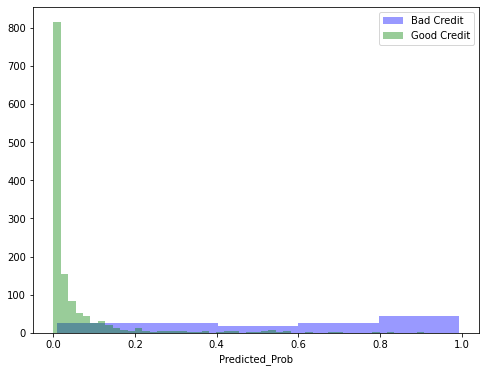

In [41]:
plt.figure( figsize = (8,6) )
# Plotting distribution of predicted probability values for bad credits
sns.distplot( pred_df[pred_df.Actual_Class == 1]['Predicted_Prob'], kde=False, color = 'b', label = 'Bad Credit')
# Plotting distribution of predicted probability values for good credits
sns.distplot( pred_df[pred_df.Actual_Class == 0]['Predicted_Prob'], kde=False, color = 'g', label = 'Good Credit') 
plt.legend()
plt.show()

## Inference
Larger the overlap between predicted probabilities for different classes,higher will be the misclassifications. From the above graph it can be seen that misclassification is low.

<H2><p style="text-align: center;"> Step 8: Receiver Operating Characteristic (ROC) and Area Under the Curve (AUC)

In [42]:
from sklearn.metrics import roc_curve,roc_auc_score

In [43]:
fpr,tpr,threshold=roc_curve(pred_df['Actual_Class'],pred_df['Predicted_Prob'], drop_intermediate = False)

ROC AUC SCORE: 0.9347899159663865


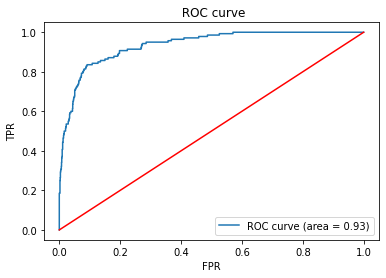

In [44]:
score=roc_auc_score(pred_df['Actual_Class'],pred_df['Predicted_Prob'])
plt.plot(fpr, tpr, label= 'ROC curve (area = %0.2f)' % score );
plt.plot([0,1],[0,1],color='r');
plt.xlabel('FPR');
plt.ylabel('TPR');
plt.legend(loc="lower right") 
plt.title(' ROC curve');


print( 'ROC AUC SCORE:' , score)

## Inference
The AUC is 0.93, which implies the model is outstanding.

<H2><p style="text-align: center;"> Step 9: Finding Optimal Classification Cut-off (Youden’s Index)

###### Sensitivity(TPR) and specificity(TNR) change when we change the cut-off probability. Youden’s index  is a classification cut-off probability for which the following function is maximized (also known as J-statistic):


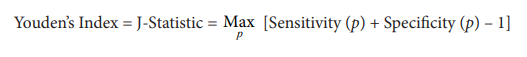

In [45]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr, 'fpr': fpr, 'thresholds': threshold } )
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr 
tpr_fpr.sort_values( 'diff', ascending = False )

,tpr,fpr,thresholds,diff
241,0.835714,0.091176,0.168603,0.744538
242,0.835714,0.091912,0.166601,0.743803
243,0.835714,0.092647,0.163958,0.743067
244,0.835714,0.093382,0.159791,0.742332
245,0.835714,0.094118,0.159559,0.741597
...,...,...,...,...
1464,1.000000,0.997059,0.000183,0.002941
1465,1.000000,0.997794,0.000177,0.002206
1466,1.000000,0.998529,0.000124,0.001471
0,0.000000,0.000000,1.993532,0.000000


### Learning
From the above result, the optimal cut-off is 0.17. We can now classify all the observations beyond 0.17 predicted probability as bad credits and others as good credits.

In [46]:
pred_df['Predicted_New'] = pred_df.Predicted_Prob.map( lambda x: 1 if x > 0.17 else 0)

In [47]:
cm_new= confusion_matrix(pred_df['Actual_Class'],pred_df['Predicted_New'])

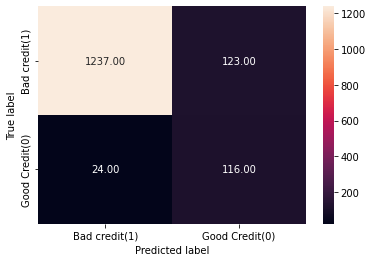

In [48]:
def draw_cm( actual, predicted ):

    cm_new = metrics.confusion_matrix( Actual_Class, Predicted_New, [1,0] ) 
sns.heatmap(cm_new, annot=True, fmt='.2f', xticklabels = ['Bad credit(1)', 'Good Credit(0)'],
           yticklabels = ['Bad credit(1)', 'Good Credit(0)'] )
plt.ylabel('True label') 
plt.xlabel('Predicted label') 
plt.show()

In [49]:
print(metrics.classification_report( pred_df.Actual_Class, pred_df.Predicted_New ))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1360
           1       0.49      0.83      0.61       140

    accuracy                           0.90      1500
   macro avg       0.73      0.87      0.78      1500
weighted avg       0.93      0.90      0.91      1500



## Inference
With cut-off probability of 0.17, the model is able to classify the bad credits better and the F1-score for 
bad credits (Y = 1) has also improved from 0.60 to 0.61.

<br><h1 style = "font-size:35px; font-family:Huihoo ; font-weight : bold; text-align: center; "> Decision Tree Learning  </h1>

Decision Tree Learning or Classification Trees are a collection of divide and conquer problem-solving
strategies that use tree-like (inverted tree in which the root is at the top) structure to predict the value 
of an outcome variable. The tree starts with the root node consisting of the complete data and thereafter uses intelligent strategies to split the nodes (parent node) into multiple branches (thus, creating children 
nodes). The original data is divided into subsets in this process. This is done to create more homogenous 
groups at the children nodes. It is one of the most powerful predictive analytics techniques used for 
generating business rules.

<H2><p style="text-align: center;"> Step 1: Splitting the Dataset

In [50]:
x=X.drop(['const', 'Experience', 'ZIP Code'], axis=1)

In [51]:
x

,Age,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,25,49,4,1.6,0,1,0,0,0,1,0,0
1,45,34,3,1.5,0,1,0,0,0,1,0,0
2,39,11,1,1.0,0,0,0,0,0,1,0,0
3,35,100,1,2.7,0,0,0,0,0,0,1,0
4,35,45,4,1.0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,0,0,0,1,0,0,0,1
4996,30,15,4,0.4,85,0,0,1,0,1,0,0
4997,63,24,2,0.3,0,0,0,0,0,0,0,1
4998,65,49,3,0.5,0,0,0,1,0,0,1,0


In [52]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state =0)

#### Classification tree uses various impurity measures such as the Gini Impurity Index and Entropy to split the nodes. 

<H2><p style="text-align: center;"> Step 2: Building Decision Tree Classifier using Gini Criteria

In [54]:
from sklearn.tree import DecisionTreeClassifier

loan_tree=DecisionTreeClassifier(criterion ='gini')

In [55]:
loan_tree.fit( X_train, y_train )

DecisionTreeClassifier()

### 2 (a). Predicting the Model

In [56]:
tree_predict=loan_tree.predict(X_test) 

In [57]:
tree_predict

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
y_test

398     0
3833    0
4836    0
4572    0
636     0
       ..
4554    0
4807    0
1073    0
2906    0
1357    0
Name: Personal Loan, Length: 1500, dtype: int64

<H2><p style="text-align: center;"> Step 3: Performance Measures

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

tree_1_report= classification_report(y_test,tree_predict)

In [60]:
print('The classification report: \n', tree_1_report)

The classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1372
           1       0.90      0.87      0.88       128

    accuracy                           0.98      1500
   macro avg       0.94      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [61]:
loan_tree_cm=confusion_matrix(y_test,tree_predict)

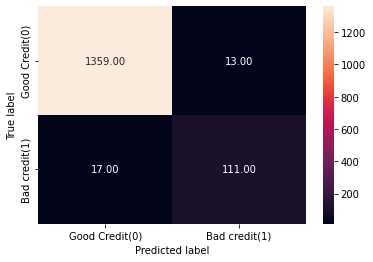

In [62]:
def draw_cm( y_test, tree_predict ):

    loan_tree_cm = metrics.confusion_matrix( y_test, tree_predict, [1,0] ) 
sns.heatmap(loan_tree_cm, annot=True, fmt='.2f', xticklabels = ['Good Credit(0)','Bad credit(1)' ],
           yticklabels = ['Good Credit(0)','Bad credit(1)' ] )
plt.ylabel('True label') 
plt.xlabel('Predicted label') 
plt.show()

<H2><p style="text-align: center;"> Step 4: Measuring test Accuracy

Using the model to predict the probability of a bad credit on the test set and obtain ROC AUC score.

In [63]:
from sklearn.metrics import roc_curve,roc_auc_score

tree_predict = loan_tree.predict( X_test ) 
roc_auc_score( y_test, tree_predict )

0.928856140670554

## Inference
The AUC is 0.93, which implies the model is fairly good.

<H2><p style="text-align: center;"> Step 5: Displaying the Tree

In [64]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

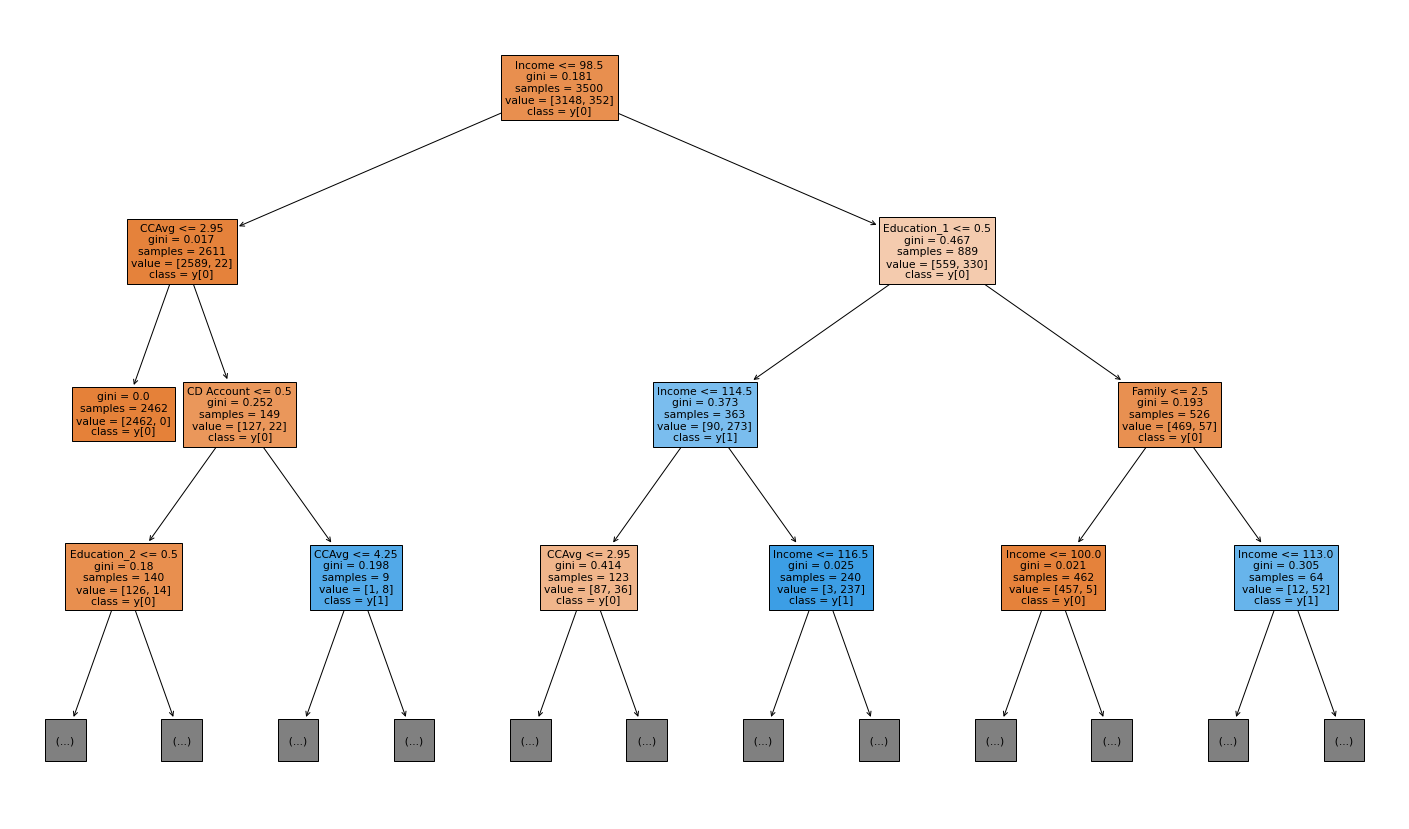

In [65]:
plt.figure(figsize=(25,15))
feature_names = X_train.columns 
tree.plot_tree(loan_tree,feature_names=feature_names, filled = True, class_names=True, max_depth= 3);

## Inference

1. At the top node, there are 3500 observations of which 3148 are good credits and 352 are bad credits. The corresponding Gini index is 0.181. Later in the section, the Gini impurity index is explained.
2. Income is the most important feature for splitting good and bad credits in the dataset when compared to other features and hence, chosen as the top splitting criteria.
3. The first rule (Income <= 98.5) means if the customer has eligible Income or not. 
4. This rule has split the dataset into two subsets represented by the second level nodes. On the left node, there are 2611 samples (i.e., not having eligible income) and on the right node, there are 889 samples (i.e. having eligible income).
5. The nodes represented by dark shades depict good credits, while the nodes represented by light shades are bad credits. 
6. One of the rules can be interpreted as: If the customer does not have Income and CCAvg is less than 2.95 and does not have CD Account , then there is high probability of being a bad credit. There are 9 records in the dataset that satisfy these conditions and 8 of them have bad credit.
7. Another rule: If the customer has eligible Income and Education_1 and Family is more than 2.5, then there is a high probability of being good credit.


### 5(a). Understanding Gini Impurity

Gini measurement is the probability of a random sample being classified correctly if we randomly pick a label according to the distribution in a branch. Gini impurity can be computed by summing the probability pi of an item with label i being chosentimes the probability 1 − pi of a mistake in categorizing that item over all classes. It reaches its minimum (zero) when all cases in the node belong to a specific category. The Gini impurity index for a classification problem with C classes is given by

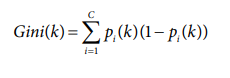

In [66]:
gini_node_1 = 1 - pow(3148/3500, 2) - pow (352/3500, 2) 
print(round( gini_node_1, 4))

0.1809


## Inference
In the top node the probability of finding good credit is 3148/3500 and finding bad credit is 352/3500.
Gini impurity for the top node in the above decision tree will be 0.181

## Decision Tree

In [67]:
column_names = list(x.columns)
feature_names = column_names
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Education_1', 'Education_2', 'Education_3']


In [79]:
from sklearn.tree import export_text

txt =export_text(loan_tree, max_depth=3)

print(' The decision rules are :\n', txt)

 The decision rules are :
 |--- feature_1 <= 98.50
|   |--- feature_3 <= 2.95
|   |   |--- class: 0
|   |--- feature_3 >  2.95
|   |   |--- feature_6 <= 0.50
|   |   |   |--- feature_10 <= 0.50
|   |   |   |   |--- truncated branch of depth 8
|   |   |   |--- feature_10 >  0.50
|   |   |   |   |--- truncated branch of depth 6
|   |   |--- feature_6 >  0.50
|   |   |   |--- feature_3 <= 4.25
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  4.25
|   |   |   |   |--- class: 0
|--- feature_1 >  98.50
|   |--- feature_9 <= 0.50
|   |   |--- feature_1 <= 114.50
|   |   |   |--- feature_3 <= 2.95
|   |   |   |   |--- truncated branch of depth 8
|   |   |   |--- feature_3 >  2.95
|   |   |   |   |--- truncated branch of depth 8
|   |   |--- feature_1 >  114.50
|   |   |   |--- feature_1 <= 116.50
|   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- feature_1 >  116.50
|   |   |   |   |--- class: 1
|   |--- feature_9 >  0.50
|   |   |--- feature_2 <= 2.50
|   |   |   |--

<H2><p style="text-align: center;"> Step 6: Building Decision Tree using Entropy Criteria

Entropy is another popular measure of impurity that is used in classification trees to split a node. Assume 
that there are J classes labelled 1, 2, …, J. The entropy at node k is given by

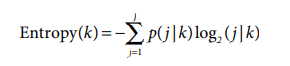

The value of entropy lies between 0 and 1, with a higher entropy indicating a higher impurity at the 
node.

In [80]:
loan_tree.tree_.max_depth

11

In [81]:
# Create a model by changing the parameters

tree_2= DecisionTreeClassifier(criterion='entropy')

In [82]:
tree_2

DecisionTreeClassifier(criterion='entropy')

In [83]:
tree_2=tree_2.fit(X_train, y_train)

In [84]:
y_pred_2= tree_2.predict(X_test)

In [85]:
y_pred_2

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
report_2= classification_report(y_test,y_pred_2)

print(report_2)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1372
           1       0.94      0.89      0.92       128

    accuracy                           0.99      1500
   macro avg       0.97      0.94      0.95      1500
weighted avg       0.99      0.99      0.99      1500



In [87]:
tree_2_cm=confusion_matrix(y_test,y_pred_2)

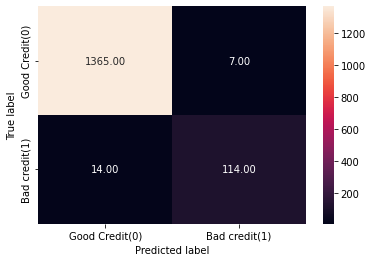

In [88]:
def draw_cm( y_test, y_pred_2 ):

    tree_2_cm = metrics.confusion_matrix( y_test, y_pred_2, [1,0] ) 
sns.heatmap(tree_2_cm, annot=True, fmt='.2f', xticklabels = ['Good Credit(0)','Bad credit(1)' ],
           yticklabels = ['Good Credit(0)','Bad credit(1)' ] )
plt.ylabel('True label') 
plt.xlabel('Predicted label') 
plt.show()

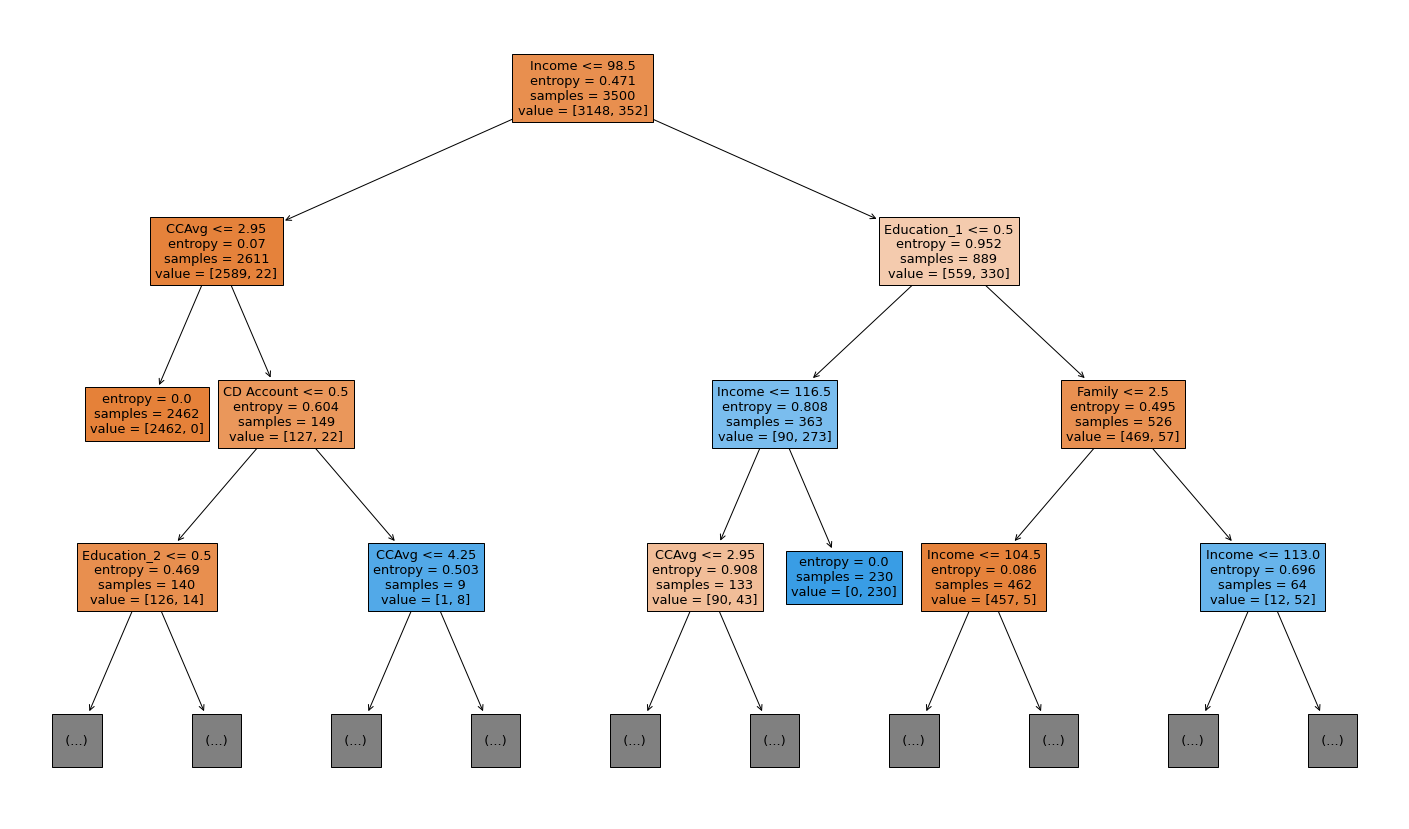

In [89]:
plt.figure(figsize=(25,15))
tree.plot_tree(tree_2,filled=True,feature_names=feature_names, max_depth=3);

## Inference
1. The nodes represented by dark shades depict majority good credits, while the nodes represented by light shades are majority bad credits. 
2. The rules generated at the top two level nodes are same as rules generated by decision tree built using Gini index. The rules at the third level nodes are different.
3. One of the rules can be interpreted as: If the customer has eligible Income, Education of 1 year and Family, then there is a high probability of being good credit. There are 64 customers who satisfy these criteria and 12 of them have good credit.


### 6 (a). Calculating Entropy

In [90]:
import math

entropy_1 = - (3148/3500)*math.log2(3148/3500) - (352/3500)*math.log2(352/3500)
print(round( entropy_1, 6))

0.470804


## Inference
At the top node there are 3500 observations of which 3148 are good credits and 352 are bad credits. At the top of the node, the probability of finding good credit is 3148 and not finding bad credit is 352. So,The entropy at the top node is 0.471

### 6 (b). Measuring Test Accuracy using AUC

In [91]:
from sklearn.metrics import roc_curve,roc_auc_score

In [92]:
tree_predict =tree_2.predict( X_test ) 
roc_auc_score( y_test, tree_predict )

0.9427614795918369

## Inference
The AUC is 0.938, which implies the model is fairly good.

<H2><p style="text-align: center;"> Step 7: Finding Optimal Criteria and Max Depth

In [93]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'criterion': ['gini','entropy'], 'max_depth': range(2,11)}]
clf_tree = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree,tuned_parameters, cv=10, scoring='roc_auc')
clf.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 11)}],
             scoring='roc_auc')

In [94]:
clf.best_score_

0.99351724150382

In [95]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 3}

## Inference
The tree with Gini criteria and max_depth = 4 is the best model. Finally, we can build a model with these parameters and measure the accuracy of the test.

<H2><p style="text-align: center;"> Step 8: Final Model

In [96]:
tree_3= DecisionTreeClassifier(criterion='gini', max_depth= 4)

In [97]:
tree_3=tree_3.fit(X_train, y_train)

In [98]:
y_pred_3= tree_3.predict(X_test)

In [99]:
report_3= classification_report(y_test,y_pred_3)

print(report_3)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1372
           1       0.91      0.86      0.88       128

    accuracy                           0.98      1500
   macro avg       0.95      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500



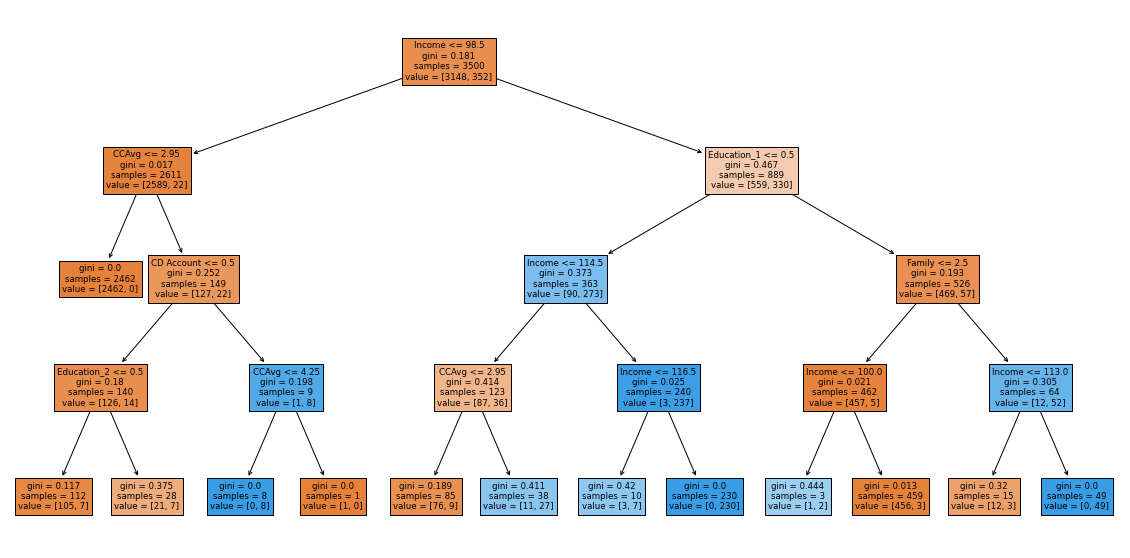

In [100]:
plt.figure(figsize=(20,10))
tree.plot_tree(tree_3,filled=True,feature_names=feature_names, max_depth= 4);

## Inference

1. Income is the most important feature for splitting good and bad credits in the dataset when compared to other features and hence, chosen as the top splitting criteria.

2. The first rule (Income <= 98.5) means if the customer has eligible Income or not. 

3. This rule has split the dataset into two subsets represented by the second level nodes. On the left node, there are 2611 samples (i.e., not having eligible income) and on the right node, there are 889 samples (i.e. having eligible income).
 
4. One of the rules can be interpreted as: If the customer does not have Income and CCAvg is more than 2.95 and does not have CD Account and education is less than 0.5, then there is high probability of being a bad credit. There are 140 records in the dataset that satisfy these conditions and 14 of them have bad credit.

5. Another rule: If the customer has eligible Income and Education_1 and Family is more than 2.5 and Income again is greater than 113, then there is a high probability of being good credit.

In [101]:
tree_predict_1 =tree_3.predict( X_test ) 
roc_auc_score( y_test, tree_predict_1 )

0.9256787536443147

## Inference
The AUC is 0.937, which implies the model is fairly good.

In [102]:

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
%matplotlib inline

In [103]:
classifiers = {
    #'Multinomial NB': MultinomialNB(), #Does not work for negative values
    'Linear SVM': SVC(kernel='linear'),
    'RBF SVM': SVC(kernel='rbf'),
    'Sigmoid SVM': SVC(kernel='sigmoid'),
    #FOR SVM USE HYPERPARAMETER TUNING TO BETTER UNDERSTAND WHAT TO TAKE
    'Ada Boost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression()
}

In [104]:
acc_scores = dict()

for classifier in classifiers:
    
    clf = classifiers[classifier]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_scores[classifier] = accuracy_score(y_pred, y_test)
    print(classifier, acc_scores[classifier])

Linear SVM 0.9646666666666667
RBF SVM 0.918
Sigmoid SVM 0.8946666666666667
Ada Boost 0.968
Decision Tree 0.9793333333333333
Random Forest 0.9846666666666667
Gradient Boosting 0.9873333333333333
Logistic Regression 0.9593333333333334


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [105]:
def predict(Age, Income, Family, CCAvg, Mortgage, Securities_Account, CD_Account, Online, CreditCard, Education_1, Education_2, Education_3):
  return clf.predict(pd.DataFrame({
      "Age": [Age],
      "Income": [Income], 
      "Family": [Family], 
      "CCAvg": [CCAvg], 
      "Mortgage": [Mortgage], 
      'Securities Account': [Securities_Account], 
      "CD Account": [CD_Account],
      "Online": [Online],
      "CreditCard": [CreditCard],
      "Education_1": [Education_1],
      "Education_2": [Education_2],
      "Education_3": [Education_3]
  }))

predict(*X_test.iloc[143])

array([0])

# Conclusion
•	We analysed the Personal Loan data by using different models like Logistic Regression and Decision Tree Classifier to build a likelihood of Customer buying Loan.

•	First, we built model using Logistic Regression and performance metric used was Recall. The most important features for classification were Income, Education, CD account, Family and CCAvg.

•	Second, we built model using Decision Tree and performance metric used was Recall. The most important features for classification were same Income, Education, CD account, Family and CCAvg.

•	Coefficient of Income, CCavg, CD account, Family are positive, i.e., a one unit increase in these will lead to increase in chances of a person borrowing loan.

•	Coefficient of Securities account, online, credit card is negative increase in these will lead to decrease in chances of a person borrowing a loan.

•	We also improved the performance using ROC-AUC curve and optimal threshold. This was best model with high recall and accuracy.

•	Decision tree require less data reprocessing compared to logistic Regression and are easy to understand.

•	Income, Customers with graduate degree, customers having 3 family members are some of the most important variables in predicting if the customers will purchase a personal loan and if the bank will allow it.

# Recommendation

•	Customers who have income above 98k dollars, Advance/graduate level education, a family of more than 2, such customers have higher chances of taking personal loans.

•	So, for this campaign we can have different profiles for customers.

•	High Profile Clients: Higher income, Advanced/Graduate level education, 3 /4 Family members, high spending

•	Average Profile: - Medium income group, Graduate level education.3/4Family members, medium spending

•	Low Profile: Lower income group, undergrads ,3/4Family Member, low spending

•	Customer Average Spending and Mortgages can also be looked upon as based on EDA and logistic Regression these parameters also play some role in likelihood of buy loan.

•	We can 1st target high profile customers, by providing them with a personal relationship manager who can address their concerns and can pursue them to buy loan from the bank with completive interest rates.

•	Prequalifying for Loan can also attract more customers.

•	Our 2nd target would be medium profile customers.

•	The model cannot identify well if there are some exceptional cases when low profile customer is ready to buy a personal loan.

